# FPL notebook

## Notebook to explore fpl data from vaastav  

### Import relevant libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from pathlib import Path
import os
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn import preprocessing

## Player data
### Load data

In [26]:
seasons = ['2016-17', '2017-18', '2018-19', '2019-20']

data_list = []
for s in seasons:
    data_list.append(pd.read_csv(Path.cwd() / 'data' / s / 'cleaned_players.csv')) # 2016-17 data not UTF-8, Windows cp1250, ISO-8859-1, or mbcs, listed as "ANSI", which is a vague term. Quick solution: Opened in notepad and then saved as a UTF-8 file. Longer term solution, figure out encoding using chardet or UnicodeDammit. 

data_list[0]

,first_name,second_name,goals_scored,assists,total_points,minutes,goals_conceded,creativity,influence,threat,bonus,bps,ict_index,clean_sheets,red_cards,yellow_cards,selected_by_percent
0,David,Ospina,0,0,2,143,4,0.0,28.8,0,0,18,2.9,0,0,0,0.2
1,Petr,Cech,0,0,134,3097,37,0.1,819.8,0,2,660,82.0,12,0,2,13.7
2,Laurent,Koscielny,2,1,121,2821,37,53.9,831.2,239,19,723,112.7,10,1,4,11.2
3,Per,Mertesacker,0,0,1,38,1,0.1,17.8,0,0,5,1.8,0,0,0,0.2
4,Gabriel Armando,de Abreu,0,0,45,1517,18,84.5,295.8,119,2,296,50.0,5,0,6,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
678,Sam,Surridge,0,0,0,0,0,0.0,0.0,0,0,0,0.0,0,0,0,0.0
679,Angel,Gomes,0,0,1,3,0,3.8,0.8,0,0,2,0.5,0,0,0,0.0
680,Kieran,O'Hara,0,0,0,0,0,0.0,0.0,0,0,0,0.0,0,0,0,0.0
681,Gerhard,Tremmel,0,0,0,0,0,0.0,0.0,0,0,0,0.0,0,0,0,0.0


## Viewing player data

Top scorers <br>
Top assisters <br>
Top mins/goal <br>
Top mins/assist <br>
Top points/minute <br>
Top points <br>
Top points/90 <br>
Top points/cost - error, come back to (might no column for 16/17 data)

In [27]:
top_scorers = []
for d in data_list:
    top_scorers.append(d[['second_name', 'goals_scored']].sort_values(by='goals_scored', ascending=False).head(5))

Text(0.5, 1.0, '2019/20')

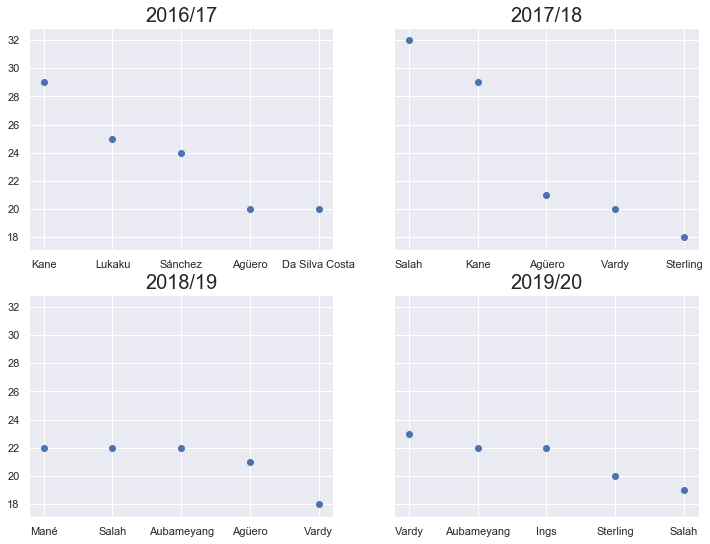

In [28]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2, nrows=2, sharey=True, figsize =(12,9))
ax1.scatter(top_scorers[0]['second_name'], top_scorers[0]['goals_scored'])
ax1.set_title('2016/17', fontsize=20)
ax2.scatter(top_scorers[1]['second_name'], top_scorers[1]['goals_scored'])
ax2.set_title('2017/18', fontsize=20)
ax3.scatter(top_scorers[2]['second_name'], top_scorers[2]['goals_scored'])
ax3.set_title('2018/19', fontsize=20)
ax4.scatter(top_scorers[3]['second_name'], top_scorers[3]['goals_scored'])
ax4.set_title('2019/20', fontsize=20)

In [29]:
top_assisters = []
for d in data_list:
    top_assisters.append(d[['second_name', 'assists']].sort_values(by='assists', ascending=False).head(5))

Text(0.5, 1.0, '2019/20')

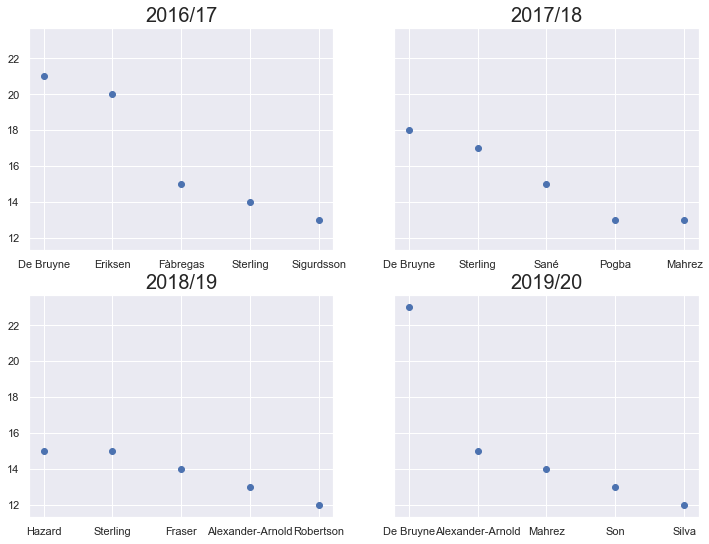

In [30]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2, nrows=2, sharey=True, figsize =(12,9))
ax1.scatter(top_assisters[0]['second_name'], top_assisters[0]['assists'])
ax1.set_title('2016/17', fontsize=20)
ax2.scatter(top_assisters[1]['second_name'], top_assisters[1]['assists'])
ax2.set_title('2017/18', fontsize=20)
ax3.scatter(top_assisters[2]['second_name'], top_assisters[2]['assists'])
ax3.set_title('2018/19', fontsize=20)
ax4.scatter(top_assisters[3]['second_name'], top_assisters[3]['assists'])
ax4.set_title('2019/20', fontsize=20)

In [31]:
stats = []
for d in data_list:
    d2 = d.drop(d[(d.goals_scored<1) | (d.assists<1)].index)
    stats.append(d2[['first_name', 'second_name', 'goals_scored', 'assists', 'minutes', 'total_points']].sort_values(by='total_points', ascending=False))
    

In [32]:
for s in stats:
    s['mins/goal'] = s.minutes/s.goals_scored
    s['mins/assist'] = s['minutes']/s['assists']
    s['points/90'] = s['total_points']/s['minutes']*90

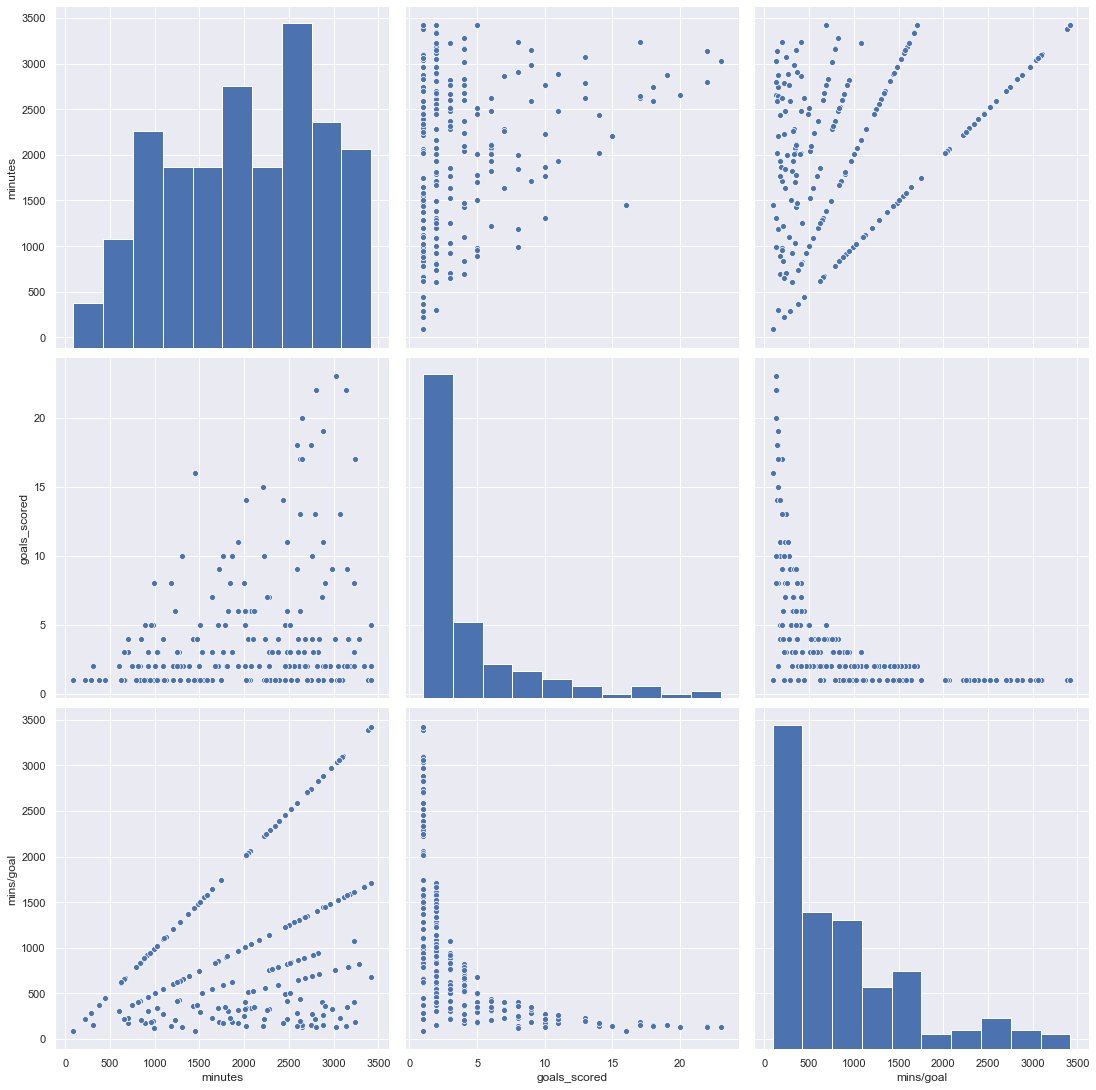

In [33]:
cols = ['minutes', 'goals_scored', 'mins/goal']
sns.pairplot(stats[3][cols], height=5)
plt.show()

## Gameweek 1 data

In [14]:
gw_1 = pd.read_csv(path_data / '2019-20' / 'gws' / 'gw1.csv')
gw_1.sort_values(by='total_points', ascending=False).head(10)

,name,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,...,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards
423,Raheem_Sterling_214,0,3,55,1,12.7,214,8,0,3,...,5,0,74.0,20,0,0,0,120,False,1
156,Erik_Pieters_447,2,2,43,1,25.1,447,3,0,0,...,0,3,1.0,14,0,0,0,45,True,0
433,Riyad_Mahrez_217,3,2,45,1,51.2,217,8,0,0,...,5,0,39.0,14,0,0,0,85,False,0
48,Ashley_Barnes_90,0,3,58,1,1.8,90,3,0,2,...,0,3,89.0,13,0,0,0,65,True,0
190,Harry_Kane_338,0,3,50,0,24.1,338,6,1,2,...,1,3,95.0,13,0,0,0,110,True,0
331,Marcus_Rashford_233,0,3,53,1,1.9,233,9,0,2,...,0,4,58.0,13,0,0,0,85,True,0
15,Ainsley_Maitland-Niles_4,1,3,38,1,12.3,4,10,0,0,...,1,0,0.0,12,0,0,0,50,False,0
138,Divock_Origi_188,1,3,46,0,26.4,188,1,1,1,...,1,4,21.0,12,0,0,0,55,True,0
372,Mohamed_Salah_191,1,2,40,0,39.7,191,1,1,1,...,1,4,39.0,12,0,0,0,125,True,0
310,Lewis_Dunk_42,1,3,41,1,13.3,42,7,0,0,...,3,0,2.0,11,0,0,0,45,False,1


## All gameweek data

In [15]:
# '2016-17' & '2017-18' don't have 'merged_gw.csv'
df_names = ['2018-19', '2019-20']

gw_data = []
for n in df_names:
    gw_data.append(pd.read_csv(path_data / n / 'gws' / 'merged_gw.csv'))

gw_data[1].columns

Index(['name', 'assists', 'bonus', 'bps', 'clean_sheets', 'creativity',
       'element', 'fixture', 'goals_conceded', 'goals_scored', 'ict_index',
       'influence', 'kickoff_time', 'minutes', 'opponent_team', 'own_goals',
       'penalties_missed', 'penalties_saved', 'red_cards', 'round', 'saves',
       'selected', 'team_a_score', 'team_h_score', 'threat', 'total_points',
       'transfers_balance', 'transfers_in', 'transfers_out', 'value',
       'was_home', 'yellow_cards', 'GW'],
      dtype='object')

In [16]:
gw_data[1]

,name,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,...,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW
0,Aaron_Cresswell_376,0,0,7,0,1.5,376,8,5,0,...,0.0,0.0,0,0,0,0,50,True,0,1
1,Aaron_Lennon_430,0,0,3,0,0.0,430,3,0,0,...,3.0,0.0,1,0,0,0,50,True,0,1
2,Aaron_Mooy_516,0,0,0,0,0.0,516,7,0,0,...,0.0,0.0,0,0,0,0,50,False,0,1
3,Aaron_Ramsdale_494,0,0,11,0,0.0,494,2,1,0,...,1.0,0.0,2,0,0,0,45,True,0,1
4,Aaron_Wan-Bissaka_122,0,2,34,1,16.1,122,9,0,0,...,4.0,2.0,8,0,0,0,55,True,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16551,Jack_Simpson_66,0,0,8,0,0.1,66,286,2,0,...,2.0,0.0,1,-7402,2014,9416,40,False,0,29
16552,Miguel_Almirón_266,0,0,5,1,12.8,266,289,0,0,...,0.0,54.0,3,11,5469,5458,58,False,0,29
16553,Jack_O'Connell_293,0,0,19,1,1.8,293,288,0,0,...,1.0,24.0,6,5397,16521,11124,47,True,0,29
16554,Luka_Milivojevic_134,0,0,4,0,1.4,134,284,0,0,...,1.0,0.0,1,-613,487,1100,67,True,0,29


In [17]:
gw_data[1].describe()

,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,ict_index,...,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,yellow_cards,GW
count,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,...,16497.000000,16497.000000,16556.000000,16556.000000,1.655600e+04,1.655600e+04,1.655600e+04,16556.000000,16556.000000,16556.000000
mean,0.041133,0.111138,6.283039,0.103044,5.051540,288.544395,149.613192,0.520899,0.045844,1.865281,...,1.203492,1.508456,5.874849,1.400821,3.819327e+02,1.195020e+04,1.156815e+04,52.123641,0.061186,15.434223
std,0.214963,0.498473,9.779773,0.304026,11.081501,167.784275,83.642743,0.958825,0.232669,3.149888,...,1.197209,1.185894,14.387284,2.509470,5.026884e+04,4.299004e+04,3.737548e+04,12.135284,0.239679,8.378610
min,0.000000,0.000000,-12.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-6.000000,-1.245778e+06,0.000000e+00,0.000000e+00,39.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,144.000000,78.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,-1.768750e+03,7.400000e+01,2.357500e+02,44.000000,0.000000,8.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,287.000000,152.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,-1.530000e+02,5.295000e+02,1.359500e+03,49.000000,0.000000,16.000000
75%,0.000000,0.000000,11.000000,0.000000,3.200000,433.000000,223.000000,1.000000,0.000000,2.700000,...,2.000000,2.000000,3.000000,2.000000,4.200000e+01,4.405500e+03,7.451000e+03,55.000000,0.000000,23.000000
max,3.000000,3.000000,90.000000,1.000000,127.700000,631.000000,290.000000,9.000000,3.000000,26.800000,...,9.000000,8.000000,176.000000,24.000000,9.849500e+05,1.030761e+06,1.263230e+06,128.000000,1.000000,29.000000


## Historical player data

In [18]:
player = pd.read_csv(path_data / '2019-20' / 'players' / 'Sergio_Agüero_210' / 'history.csv')
player

,assists,bonus,bps,clean_sheets,creativity,element_code,end_cost,goals_conceded,goals_scored,ict_index,...,own_goals,penalties_missed,penalties_saved,red_cards,saves,season_name,start_cost,threat,total_points,yellow_cards
0,9,30,0,18,0.0,37572,114,18,23,0.0,...,0,0,0,0,0,2011/12,110,0.0,211,2
1,3,16,0,10,0.0,37572,111,20,12,0.0,...,0,0,0,0,0,2012/13,115,0.0,121,2
2,11,22,176,9,0.0,37572,126,13,17,0.0,...,0,1,0,0,0,2013/14,110,0.0,156,4
3,10,27,831,9,0.0,37572,129,31,26,0.0,...,0,1,0,0,0,2014/15,120,0.0,216,4
4,3,24,655,12,0.0,37572,133,30,24,0.0,...,0,1,0,0,0,2015/16,130,0.0,184,1
5,5,32,640,8,518.2,37572,127,30,20,323.9,...,0,1,0,1,0,2016/17,130,1853.0,175,4
6,6,22,740,13,570.8,37572,115,12,21,302.5,...,0,0,0,0,0,2017/18,115,1484.0,169,2
7,11,26,740,17,523.7,37572,120,15,21,315.4,...,0,0,0,0,0,2018/19,110,1685.0,201,4


In [19]:
player.columns

Index(['assists', 'bonus', 'bps', 'clean_sheets', 'creativity', 'element_code',
       'end_cost', 'goals_conceded', 'goals_scored', 'ict_index', 'influence',
       'minutes', 'own_goals', 'penalties_missed', 'penalties_saved',
       'red_cards', 'saves', 'season_name', 'start_cost', 'threat',
       'total_points', 'yellow_cards'],
      dtype='object')

## Extracting historical data about players

just realised should be separating GKs now, as they will not have the same stats <br>
should therefore separate all positions really

In [20]:
player_names = os.listdir(path_data / '2019-20' / 'players')

names = []
seasons = []
points_18_19 = []
cost_18_19 = []

a = np.empty((1,len(player.columns)))
a[:] = np.NaN
NaN_df = pd.DataFrame(a, columns=[player.columns])

# can't seem to create empty data frame so have created with arbitrary first line to remove later
player_data = pd.DataFrame(player.loc[player.season_name=='2017/18'])
for name in player_names:
    if os.path.isfile(path_data / '2019-20' / 'players' / name / 'history.csv') == True:
        df = pd.read_csv(path_data / '2019-20' / 'players' / name / 'history.csv')
        if df['season_name'].str.contains('2018/19').any() and df['season_name'].str.contains('2017/18').any():
            names.append(name)
            seasons.append(len(df))
            points_18_19.append(df.loc[df.season_name=='2018/19', 'total_points'].item())
            cost_18_19.append(df.loc[df.season_name=='2018/19', 'start_cost'].item())
            player_data = player_data.append(df.loc[df.season_name=='2017/18'], ignore_index=True)
            
player_data = player_data.iloc[1:]
player_data['name'] = names
player_data['cost_18_19'] = cost_18_19
player_data['points_18_19'] = points_18_19
#print(len(player_data), len(names), len(cost_18_19), len(points_18_19))
player_data

,assists,bonus,bps,clean_sheets,creativity,element_code,end_cost,goals_conceded,goals_scored,ict_index,...,red_cards,saves,season_name,start_cost,threat,total_points,yellow_cards,name,cost_18_19,points_18_19
1,7,10,613,10,562.7,55459,49,60,1,145.0,...,0,0,2017/18,50,193.0,118,7,Aaron_Cresswell_376,55,34
2,4,0,204,6,203.2,17349,54,30,0,73.3,...,0,0,2017/18,55,297.0,65,2,Aaron_Lennon_430,50,41
3,3,8,576,10,848.8,74471,52,52,4,195.2,...,0,0,2017/18,55,350.0,113,4,Aaron_Mooy_516,55,76
4,0,0,116,2,60.0,214590,45,10,0,26.8,...,0,0,2017/18,45,2.0,15,1,Aaron_Wan-Bissaka_122,40,120
5,4,16,679,9,595.8,121599,52,63,7,199.7,...,0,0,2017/18,50,537.0,136,10,Abdoulaye_Doucouré_368,60,124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,8,13,522,9,891.5,47431,70,19,6,224.5,...,0,0,2017/18,70,715.0,130,1,Willian_Borges Da Silva_113,75,108
317,0,0,54,1,0.0,20310,48,4,0,5.5,...,0,7,2017/18,50,0.0,11,0,Willy_Caballero_112,50,13
318,3,5,190,4,267.0,108413,46,16,2,64.3,...,0,0,2017/18,50,136.0,53,0,Will_Hughes_370,50,87
319,0,3,264,5,48.8,48717,48,27,0,43.6,...,0,0,2017/18,50,64.0,42,5,Winston_Reid_383,45,0


In [21]:
player_data.describe()

,assists,bonus,bps,clean_sheets,creativity,element_code,end_cost,goals_conceded,goals_scored,ict_index,...,penalties_missed,penalties_saved,red_cards,saves,start_cost,threat,total_points,yellow_cards,cost_18_19,points_18_19
count,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,...,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000
mean,2.225000,5.815625,331.656250,5.918750,258.316875,91991.371875,54.553125,24.028125,2.403125,94.005313,...,0.056250,0.059375,0.090625,5.415625,56.031250,279.334375,72.281250,2.487500,55.296875,67.981250
std,3.082868,6.383787,220.095293,4.435496,288.744460,60180.363985,14.972817,16.321106,4.184985,78.812686,...,0.268442,0.316088,0.308561,21.636475,14.450183,350.274103,51.006137,2.415954,14.367195,53.302764
min,0.000000,0.000000,-1.000000,0.000000,0.000000,6744.000000,40.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.000000,40.000000,0.000000
25%,0.000000,0.000000,170.000000,2.000000,31.750000,46890.250000,45.000000,11.000000,0.000000,33.075000,...,0.000000,0.000000,0.000000,0.000000,45.000000,26.000000,32.000000,0.000000,45.000000,24.750000
50%,1.000000,4.000000,336.000000,6.000000,164.100000,77576.500000,49.500000,24.500000,1.000000,83.550000,...,0.000000,0.000000,0.000000,0.000000,50.000000,145.500000,72.000000,2.000000,50.000000,60.000000
75%,3.000000,9.000000,492.000000,9.000000,377.650000,121898.750000,58.000000,34.000000,3.000000,127.100000,...,0.000000,0.000000,0.000000,0.000000,60.000000,404.500000,101.250000,4.000000,60.000000,98.250000
max,18.000000,31.000000,913.000000,19.000000,1744.200000,433154.000000,131.000000,63.000000,32.000000,454.400000,...,2.000000,3.000000,2.000000,137.000000,125.000000,2355.000000,303.000000,11.000000,130.000000,259.000000


In [22]:
player_data_ordered = player_data[['name', 'assists', 'bonus', 'bps', 'clean_sheets', 'creativity', 'end_cost',
       'goals_conceded', 'goals_scored', 'ict_index', 'influence', 'minutes',
       'own_goals', 'penalties_missed', 'penalties_saved', 'red_cards',
       'saves', 'start_cost', 'threat', 'total_points',
       'yellow_cards', 'cost_18_19', 'points_18_19']]
player_data_ordered

,name,assists,bonus,bps,clean_sheets,creativity,end_cost,goals_conceded,goals_scored,ict_index,...,penalties_missed,penalties_saved,red_cards,saves,start_cost,threat,total_points,yellow_cards,cost_18_19,points_18_19
1,Aaron_Cresswell_376,7,10,613,10,562.7,49,60,1,145.0,...,0,0,0,0,50,193.0,118,7,55,34
2,Aaron_Lennon_430,4,0,204,6,203.2,54,30,0,73.3,...,0,0,0,0,55,297.0,65,2,50,41
3,Aaron_Mooy_516,3,8,576,10,848.8,52,52,4,195.2,...,0,0,0,0,55,350.0,113,4,55,76
4,Aaron_Wan-Bissaka_122,0,0,116,2,60.0,45,10,0,26.8,...,0,0,0,0,45,2.0,15,1,40,120
5,Abdoulaye_Doucouré_368,4,16,679,9,595.8,52,63,7,199.7,...,0,0,0,0,50,537.0,136,10,60,124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,Willian_Borges Da Silva_113,8,13,522,9,891.5,70,19,6,224.5,...,0,0,0,0,70,715.0,130,1,75,108
317,Willy_Caballero_112,0,0,54,1,0.0,48,4,0,5.5,...,0,0,0,7,50,0.0,11,0,50,13
318,Will_Hughes_370,3,5,190,4,267.0,46,16,2,64.3,...,0,0,0,0,50,136.0,53,0,50,87
319,Winston_Reid_383,0,3,264,5,48.8,48,27,0,43.6,...,0,0,0,0,50,64.0,42,5,45,0


In [23]:
player_data_ordered.to_csv('historical_player_data.csv', index=False)

## Exploring historical player data

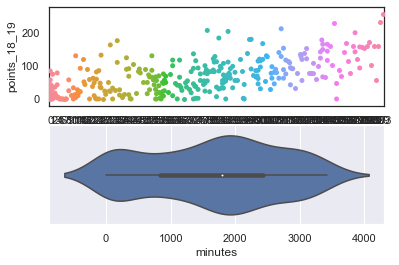

In [24]:
# load data
#players = sns.load_dataset("player_data_ordered")

with sns.axes_style("white"):
    plt.subplot(211)
    sns.swarmplot(x=player_data_ordered['total_points'], y=player_data_ordered['points_18_19'])
    
# Initialize second subplot
plt.subplot(212)

# Plot violinplot
sns.violinplot(x = player_data_ordered['minutes'])

# Show the plot                   
plt.show()


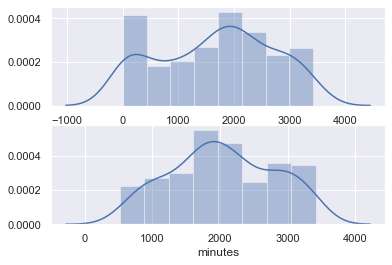

In [25]:
plt.subplot(211)
sns.distplot(player_data_ordered['minutes'])
plt.subplot(212)
sns.distplot(player_data_ordered.loc[player_data_ordered.minutes > 500, 'minutes'])

Justification to only analyse players with > 25 points & > 500 minutes in 17_18?

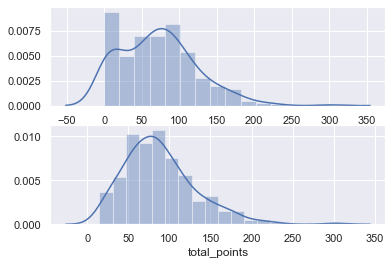

In [26]:
plt.subplot(211)
sns.distplot(player_data_ordered['total_points'])
plt.subplot(212)
sns.distplot(player_data_ordered.loc[player_data_ordered.minutes > 500, 'total_points'])

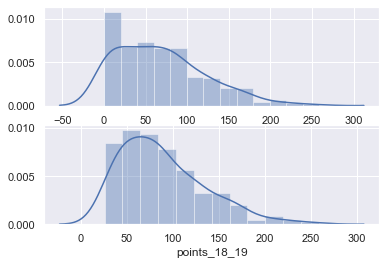

In [27]:
plt.subplot(211)
sns.distplot(player_data_ordered['points_18_19'])
plt.subplot(212)
sns.distplot(player_data_ordered.loc[player_data_ordered.points_18_19 > 25, 'points_18_19'])

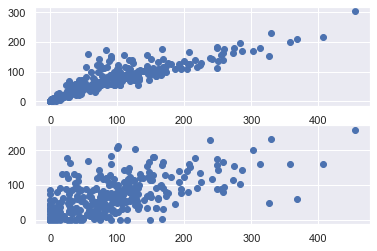

In [28]:
plt.subplot(211)
plt.scatter(player_data_ordered['ict_index'], player_data_ordered['total_points'])
plt.subplot(212)
plt.scatter(player_data_ordered['ict_index'], player_data_ordered['points_18_19'])

## Regression analysis

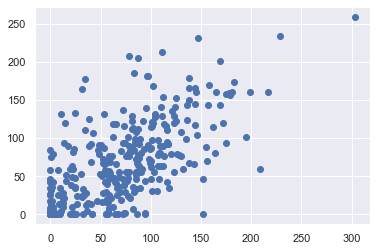

In [29]:
plt.scatter(player_data_ordered['total_points'], player_data_ordered['points_18_19'])

### Multicolinearity

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = player_data_ordered.iloc[:,1:-1]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns
vif

,VIF,features
0,10.614559,assists
1,11.055151,bonus
2,164.377672,bps
3,37.493977,clean_sheets
4,24450.140743,creativity
5,886.651541,end_cost
6,53.094288,goals_conceded
7,22.042792,goals_scored
8,244118.365207,ict_index
9,40030.162479,influence


'ict_index' is calculated from 'threat', 'creativity', and 'influence', explains high VIF

### Restrict data to players with > 500 minutes in 17/18, and > 25 points in 18/19

In [31]:
player_data_restrict = player_data_ordered[(player_data_ordered.minutes > 500) & (player_data.points_18_19 > 25)]
player_data_restrict[['minutes', 'total_points', 'points_18_19']].describe()

,minutes,total_points,points_18_19
count,215.000000,215.000000,215.000000
mean,2156.302326,94.734884,91.855814
std,753.257212,43.735285,46.318308
min,530.000000,15.000000,26.000000
25%,1663.000000,65.000000,56.000000
50%,2169.000000,87.000000,83.000000
75%,2817.000000,116.000000,119.000000
max,3420.000000,303.000000,259.000000


### Declare features and standardize

#### New Features

In [32]:
#player_data_restrict[['start_cost', 'end_cost', 'cost_18_19']]
player_data_restrict['season_cost_change'] = player_data_restrict['cost_18_19'] - player_data_restrict['start_cost']
player_data_restrict['points/90'] = player_data_restrict['total_points']/player_data_restrict['minutes']*90

<ipython-input-32-9cec29dd0619>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_data_restrict['season_cost_change'] = player_data_restrict['cost_18_19'] - player_data_restrict['start_cost']
<ipython-input-32-9cec29dd0619>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_data_restrict['points/90'] = player_data_restrict['total_points']/player_data_restrict['minutes']*90


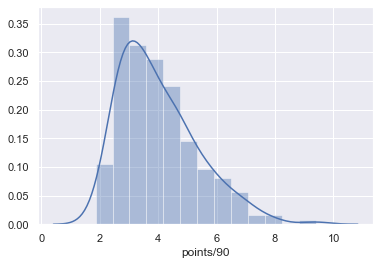

In [33]:
sns.distplot(player_data_restrict['points/90'])

In [34]:
# single feature
#inputs = np.array(test_df['total_points']).reshape(-1,1)

# named features
#inputs = player_data_restrict[['assists', 'bonus', 'bps', 'clean_sheets', 'end_cost',
#       'goals_conceded', 'goals_scored', 'minutes',
#       'own_goals', 'penalties_missed', 'penalties_saved', 'red_cards',
#       'saves', 'start_cost', 'total_points',
#       'yellow_cards', 'cost_18_19', 'ict_index']]
# 'creativity', 'influence',  'threat',

inputs = player_data_restrict[['total_points', 'season_cost_change', 'minutes', 'points/90']] # gives good accuracy

# all features
#inputs = player_data_restrict.iloc[:,1:-1]
targets = player_data_restrict['points_18_19']
#targets = player_data_restrict.iloc[:,-1]

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [35]:
inputs_scaled = scaler.transform(inputs)
inputs_scaled

array([[ 5.33194434e-01,  7.97738025e-01,  1.21449572e+00,
        -4.07364752e-01],
       [-6.81469815e-01, -7.90351562e-01, -3.33068783e-01,
        -7.00409565e-01],
       [ 4.18603467e-01,  3.69323160e-03,  1.21050372e+00,
        -5.14785604e-01],
       [-1.82737948e+00, -7.90351562e-01, -2.03499054e+00,
        -1.38676441e+00],
       [ 9.45721914e-01,  1.59178282e+00,  1.55381554e+00,
        -2.41122411e-01],
       [-8.87733555e-01, -7.90351562e-01, -1.18831564e-01,
        -1.17309433e+00],
       [-8.41897169e-01,  7.97738025e-01,  6.61310033e-02,
        -1.22706700e+00],
       [-1.59819755e+00,  3.69323160e-03, -1.66107340e+00,
        -1.14338408e+00],
       [ 9.91558301e-01, -1.58439635e+00,  5.41550097e-02,
         1.23539555e+00],
       [ 1.31241301e+00, -2.37844115e+00,  5.18557427e-01,
         1.02560417e+00],
       [-1.31433174e-01,  3.69323160e-03, -4.38191393e-01,
         2.84744489e-01],
       [-9.79406329e-01,  3.69323160e-03, -7.13639245e-01,
      

### Split the data

In [36]:
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=42)

### Linear Regression

In [37]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

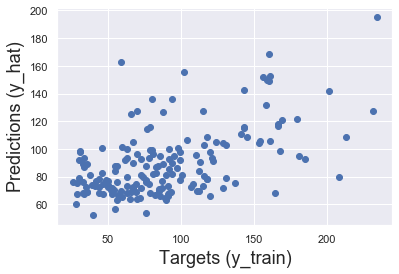

In [38]:
y_hat = reg.predict(x_train)

plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)', size=18)
plt.ylabel('Predictions (y_hat)', size=18)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

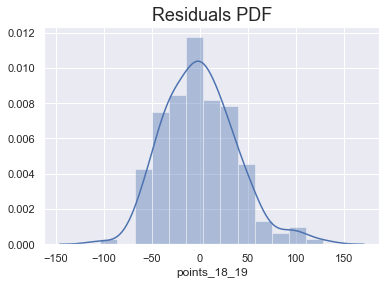

In [39]:
sns.distplot(y_train - y_hat)
plt.title('Residuals PDF', size=18)

In [40]:
r2 = reg.score(x_train, y_train)
r2

0.30213378516101286

In [41]:
n = inputs.shape[0]
p = inputs.shape[1]

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2 

0.28884109535455593

### Manually check the accuracy

e.g. how many predictions are within 10% of the targets <br>

is the absolute difference between y_hat and y less than 10% of y

In [42]:
model_outputs = reg.predict(x_train)
accuracy_threshold = 0.2

In [43]:
abs(model_outputs-y_train) <= y_train * accuracy_threshold

145    False
130     True
148     True
204    False
314    False
       ...  
161     True
22      True
144     True
264    False
156    False
Name: points_18_19, Length: 172, dtype: bool

In [44]:
np.sum(abs(model_outputs-y_train) <= y_train * accuracy_threshold)

67

In [45]:
model_outputs.shape[0]

172

In [46]:
np.sum(abs(model_outputs-y_train) <= y_train * accuracy_threshold) / model_outputs.shape[0]

0.38953488372093026

In [47]:
threshold = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
acc = []
for t in threshold:
    acc.append((np.sum(abs(model_outputs-y_train) <= y_train * t) / model_outputs.shape[0]).round(2))
    
acc_df = pd.DataFrame(threshold, columns=['threshold'])
acc_df['accuracy'] = acc
acc_df

,threshold,accuracy
0,0.05,0.12
1,0.10,0.21
2,0.20,0.39
3,0.30,0.53
4,0.40,0.65
5,0.50,0.75


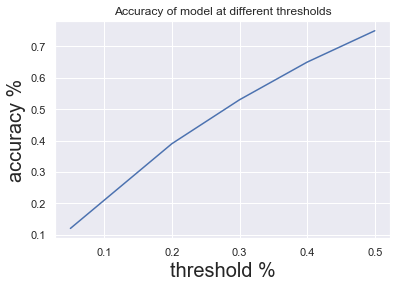

In [48]:
plt.plot(acc_df['threshold'], acc_df['accuracy'])
plt.title('Accuracy of model at different thresholds')
plt.xlabel('threshold %', fontsize=20)
plt.ylabel('accuracy %', fontsize=20)
plt.show()

### Creating a summary table

In [49]:
reg.intercept_

90.86995433201903

In [50]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
# add bias to table
#reg_summary = reg_summary.index + 1
#reg_summary.loc[0] = ['intercept', reg.intercept_[0]]
#reg_summary = reg_summary.sort_index()
reg_summary

,Features,Weights
0,total_points,42.389879
1,season_cost_change,2.481807
2,minutes,-20.779451
3,points/90,-8.870807


In [51]:
reg_summary.sort_values('Weights', ascending=False)

,Features,Weights
0,total_points,42.389879
1,season_cost_change,2.481807
3,points/90,-8.870807
2,minutes,-20.779451


### Testing

In [52]:
y_hat_test = reg.predict(x_test)

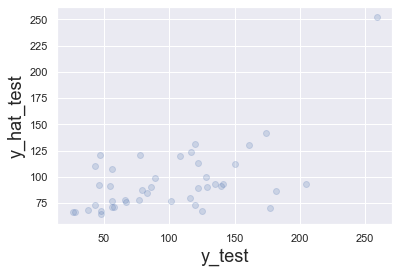

In [53]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('y_test', size=18)
plt.ylabel('y_hat_test', size=18)
plt.show()

In [54]:
y_hat_test

array([ 77.25525594, 120.03454322, 129.89499902,  93.09300069,
        93.16338798,  77.55462724,  90.99591603,  78.2217496 ,
        79.47885951,  99.82257118,  73.2857734 ,  90.40338461,
        76.83615835, 120.72687523,  75.84454874, 110.02226276,
        73.67110409, 113.5174916 , 252.49696284,  71.60993922,
        87.47523644, 123.82714779,  86.5526314 ,  70.82106773,
       121.03836051,  66.10497671,  68.11816337,  64.25848264,
       107.42768897,  99.19240772,  84.92776701, 131.17632094,
        92.47158724,  67.86887931,  71.49462062, 112.51755284,
        67.58348147,  66.92604601,  93.40334022, 141.32453543,
        90.46496979,  89.16021747,  90.97528852])

In [55]:
table = pd.DataFrame(y_test)
table['y_hat'] = y_hat_test
table['delta'] = table.iloc[:,0] - table.iloc[:,1]
table['perc_diff'] = abs(table['delta'] / table['points_18_19'] * 100)
table['name'] = player_data_restrict['name']
table['total_points'] = player_data_restrict['total_points']
table.drop(table[table.points_18_19 == 0].index, inplace=True)
table = table[['name', 'total_points', 'points_18_19', 'y_hat', 'delta', 'perc_diff']]
table.sort_values(by='points_18_19', ascending=False)

,name,total_points,points_18_19,y_hat,delta,perc_diff
229,Mohamed_Salah_191,303,259,252.496963,6.503037,2.510825
258,Pierre-Emerick_Aubameyang_11,87,205,93.093001,111.906999,54.588780
123,Gylfi_Sigurdsson_151,96,182,86.552631,95.447369,52.443609
35,Aymeric_Laporte_202,35,177,70.821068,106.178932,59.988097
151,Jamie_Vardy_166,183,174,141.324535,32.675465,18.779003
205,Marcos_Alonso_103,165,161,129.894999,31.105001,19.319876
190,Kyle_Walker_203,138,150,112.517553,37.482447,24.988298
174,Joshua_King_68,110,141,93.403340,47.596660,33.756496
247,Patrick_van Aanholt_123,95,140,90.995916,49.004084,35.002917
23,Andros_Townsend_135,121,135,93.163388,41.836612,30.990083


In [56]:
table.describe()

,total_points,points_18_19,y_hat,delta,perc_diff
count,43.000000,43.000000,43.000000,43.000000,43.000000
mean,99.627907,100.116279,95.186981,4.929298,43.704207
std,50.020007,52.514492,31.969296,42.995404,42.282569
min,21.000000,26.000000,64.258483,-73.726875,0.720295
25%,67.500000,56.000000,74.757826,-20.209820,15.859311
50%,96.000000,89.000000,90.403385,-6.827148,30.990083
75%,123.000000,128.500000,108.724976,34.680462,54.883083
max,303.000000,259.000000,252.496963,111.906999,156.865692


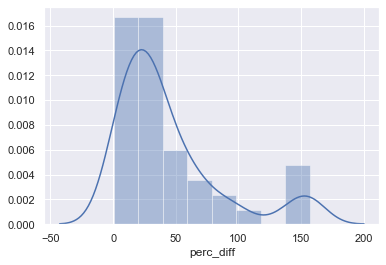

In [57]:
sns.distplot(table['perc_diff'])

## Preprocess dataset for Tensorflow

### Shuffle

In [58]:
inputs_scaled_all = inputs_scaled # already scaled inputs for regression, so already a numpy array
targets_all = targets.to_numpy()

shuffled_indices = np.arange(inputs_scaled_all.shape[0])
np.random.shuffle(shuffled_indices)

shuffled_inputs = inputs_scaled_all[shuffled_indices]
shuffled_targets = targets_all[shuffled_indices]

### Split the dataset into train, validation, and test

In [59]:
# Count the total number of samples
samples_count = shuffled_inputs.shape[0]

# Count the samples in each subset, assuming we want 80-10-10 distribution of training, validation, and test.
train_samples_count = int(0.8 * samples_count)
validation_samples_count = int(0.1 * samples_count)

# The 'test' dataset contains all remaining data.
test_samples_count = samples_count - train_samples_count - validation_samples_count

# Create variables that record the inputs and targets for training
# In our shuffled dataset, they are the first "train_samples_count" observations
train_inputs = shuffled_inputs[:train_samples_count]
train_targets = shuffled_targets[:train_samples_count]

# Create variables that record the inputs and targets for validation.
# They are the next "validation_samples_count" observations, folllowing the "train_samples_count" we already assigned
validation_inputs = shuffled_inputs[train_samples_count:train_samples_count+validation_samples_count]
validation_targets = shuffled_targets[train_samples_count:train_samples_count+validation_samples_count]

# Create variables that record the inputs and targets for test.
# They are everything that is remaining.
test_inputs = shuffled_inputs[train_samples_count+validation_samples_count:]
test_targets = shuffled_targets[train_samples_count+validation_samples_count:]

# We balanced our dataset to be 50-50 (for targets 0 and 1), but the training, validation, and test were 
# taken from a shuffled dataset. Check if they are balanced, too. Note that each time you rerun this code, 
# you will get different values, as each time they are shuffled randomly.
# Normally you preprocess ONCE, so you need not rerun this code once it is done.
# If you rerun this whole sheet, the npzs will be overwritten with your newly preprocessed data.

# Print the number of targets that are 1s, the total number of samples, and the proportion for training, validation, and test.
print(np.mean(train_targets), train_samples_count)
print(np.mean(validation_targets), validation_samples_count)
print(np.mean(test_targets), test_samples_count)

89.9186046511628 172
109.04761904761905 21
90.5909090909091 22


### Save the three datasets in *.npz

In [60]:
#np.savez('player_data_train', inputs=train_inputs, targets=train_targets)
#np.savez('player_data_validation', inputs=validation_inputs, targets=validation_targets)
#np.savez('player_data_test', inputs=test_inputs, targets=test_targets)

## Thoughts

Need to separate players by position somehow - look at Vaastav ReadMe & SolPaul notebooks <br>
Could categorise/one-hot encode targets e.g. 1 if got within 25% of points last season, 0 if otherwise 

Create new features e.g. one feature minus another or divided etc. 
e.g. start cost-end cost, if difference is large, suggests player performed better than expected

Could categorise players in terms of if they are going to do better or worse than last season 
e.g. 0 for worse, 1 for better

In [61]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(reg, random_state=1).fit(x_test, y_test)
eli5.show_weights(perm, feature_names = inputs.columns.tolist())

C:\Users\User\anaconda3\envs\py3-FPL\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\User\anaconda3\envs\py3-FPL\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


Weight,Feature
1.8743 ± 1.0713,total_points
0.2998 ± 0.2116,minutes
0.0746 ± 0.1106,points/90
0.0030 ± 0.0153,season_cost_change


## K-means clustering

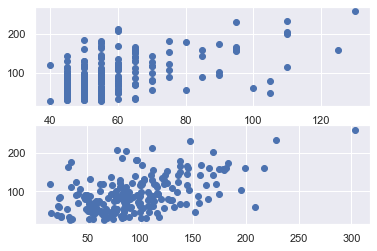

In [62]:
plt.subplot(211)
plt.scatter(player_data_restrict['cost_18_19'], player_data_restrict['points_18_19'])
plt.subplot(212)
plt.scatter(player_data_restrict['total_points'], player_data_restrict['points_18_19'])

In [63]:
x = player_data_restrict[['cost_18_19', 'points_18_19']]
x_scaled = preprocessing.scale(x)
kmeans = KMeans(4)
kmeans.fit(x_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [64]:
x_copy = x.copy()
x_copy['category'] = kmeans.fit_predict(x_scaled)

Text(0.5, 1.0, 'Clusters of players')

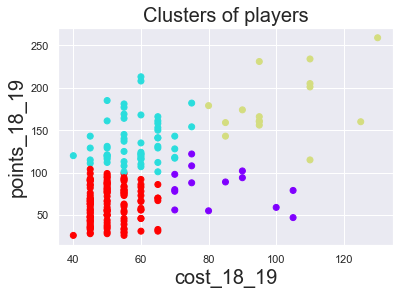

In [65]:
plt.scatter(x['cost_18_19'], x['points_18_19'], c=x_copy['category'], cmap='rainbow')
plt.xlabel('cost_18_19', fontsize=20)
plt.ylabel('points_18_19', fontsize=20)
plt.title('Clusters of players', fontsize=20)

Four clusters: <br>
Low cost, low points <br>
Low cost, high points <br>
High cost, low points <br>
High cost, high points

### Elbow method and WCSS

In [66]:
wcss = []
# 'cl_num' is a that keeps track the highest number of clusters we want to use the WCSS method for. We have it set at 10 right now, but it is completely arbitrary.
cl_num = 10
for i in range (1,cl_num):
    kmeans= KMeans(i)
    kmeans.fit(x_scaled)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
wcss

[429.99999999999994,
 216.37680259717973,
 133.8850734166943,
 109.00076403806563,
 84.69081271968523,
 71.12507176685313,
 60.45427008676859,
 48.53620578372711,
 42.02066576222013]

Text(0, 0.5, 'Within-cluster Sum of Squares')

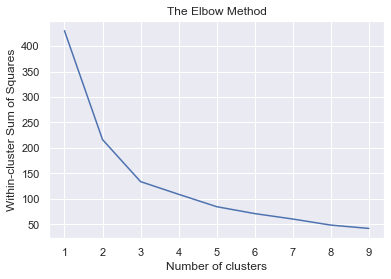

In [67]:
number_clusters = range(1,cl_num)
plt.plot(number_clusters, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')

In [68]:
x_copy

,cost_18_19,points_18_19,category
1,55,34,3
2,50,41,3
3,55,76,3
4,40,120,1
5,60,124,1
...,...,...,...
314,50,89,3
315,70,143,1
316,75,108,0
318,50,87,3


# Use categories for tensorflow model

In [69]:
player_data_restrict['category'] = x_copy.loc[:,'category'].copy()
player_data_restrict

<ipython-input-69-d3436c1c37c3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_data_restrict['category'] = x_copy.loc[:,'category'].copy()


,name,assists,bonus,bps,clean_sheets,creativity,end_cost,goals_conceded,goals_scored,ict_index,...,saves,start_cost,threat,total_points,yellow_cards,cost_18_19,points_18_19,season_cost_change,points/90,category
1,Aaron_Cresswell_376,7,10,613,10,562.7,49,60,1,145.0,...,0,50,193.0,118,7,55,34,5,3.460411,3
2,Aaron_Lennon_430,4,0,204,6,203.2,54,30,0,73.3,...,0,55,297.0,65,2,50,41,-5,3.069255,3
3,Aaron_Mooy_516,3,8,576,10,848.8,52,52,4,195.2,...,0,55,350.0,113,4,55,76,0,3.317025,3
4,Aaron_Wan-Bissaka_122,0,0,116,2,60.0,45,10,0,26.8,...,0,45,2.0,15,1,40,120,-5,2.153110,1
5,Abdoulaye_Doucouré_368,4,16,679,9,595.8,52,63,7,199.7,...,0,50,537.0,136,10,60,124,10,3.682310,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,Wilfred_Ndidi_176,4,4,449,9,230.7,49,45,0,117.2,...,0,50,299.0,78,6,50,89,0,2.424033,3
315,Wilfried_Zaha_133,7,8,404,10,716.9,71,31,9,251.0,...,0,70,1125.0,136,5,70,143,0,4.801883,1
316,Willian_Borges Da Silva_113,8,13,522,9,891.5,70,19,6,224.5,...,0,70,715.0,130,1,75,108,5,6.243330,0
318,Will_Hughes_370,3,5,190,4,267.0,46,16,2,64.3,...,0,50,136.0,53,0,50,87,0,4.832827,3


In [70]:
dummies = pd.get_dummies(player_data_restrict['category'], columns=[['cat_1', 'cat_2', 'cat_3', 'cat_4']], drop_first=False)
dummies.columns = ['cat_1', 'cat_2', 'cat_3', 'cat_4'] 
dummies
player_categories = pd.concat([player_data_restrict, dummies], axis=1)
player_categories.drop(['category'], axis=1, inplace=True)
player_categories

,name,assists,bonus,bps,clean_sheets,creativity,end_cost,goals_conceded,goals_scored,ict_index,...,total_points,yellow_cards,cost_18_19,points_18_19,season_cost_change,points/90,cat_1,cat_2,cat_3,cat_4
1,Aaron_Cresswell_376,7,10,613,10,562.7,49,60,1,145.0,...,118,7,55,34,5,3.460411,0,0,0,1
2,Aaron_Lennon_430,4,0,204,6,203.2,54,30,0,73.3,...,65,2,50,41,-5,3.069255,0,0,0,1
3,Aaron_Mooy_516,3,8,576,10,848.8,52,52,4,195.2,...,113,4,55,76,0,3.317025,0,0,0,1
4,Aaron_Wan-Bissaka_122,0,0,116,2,60.0,45,10,0,26.8,...,15,1,40,120,-5,2.153110,0,1,0,0
5,Abdoulaye_Doucouré_368,4,16,679,9,595.8,52,63,7,199.7,...,136,10,60,124,10,3.682310,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,Wilfred_Ndidi_176,4,4,449,9,230.7,49,45,0,117.2,...,78,6,50,89,0,2.424033,0,0,0,1
315,Wilfried_Zaha_133,7,8,404,10,716.9,71,31,9,251.0,...,136,5,70,143,0,4.801883,0,1,0,0
316,Willian_Borges Da Silva_113,8,13,522,9,891.5,70,19,6,224.5,...,130,1,75,108,5,6.243330,1,0,0,0
318,Will_Hughes_370,3,5,190,4,267.0,46,16,2,64.3,...,53,0,50,87,0,4.832827,0,0,0,1


In [71]:
player_categories.to_csv('player_categories.csv', index=False)

In [72]:
player_categories.loc[player_categories.cat_4 == 1].max()

name                  Will_Hughes_370
assists                             9
bonus                              21
bps                               778
clean_sheets                       16
creativity                       1052
end_cost                           75
goals_conceded                     62
goals_scored                        8
ict_index                       219.2
influence                      1002.8
minutes                          3420
own_goals                           4
penalties_missed                    1
penalties_saved                     2
red_cards                           2
saves                             124
start_cost                         80
threat                            944
total_points                      156
yellow_cards                       11
cost_18_19                         65
points_18_19                      104
season_cost_change                 10
points/90                     6.94238
cat_1                               0
cat_2       

## Creating csv with binary column, 0 if player got performed worse than last season, 1 if performed better

In [85]:
#player_data_restrict.drop(['category', 'season_cost_change', 'points/90'], axis=1, inplace=True)
player_data_restrict['improve'] = player_data_restrict['points_18_19'] - player_data_restrict['total_points'] 
player_data_restrict.loc[player_data_restrict.improve > 0, 'improve'] = 1
player_data_restrict.loc[player_data_restrict.improve <= 0, 'improve'] = 0
player_data_restrict.drop('points_18_19', axis=1, inplace=True)
player_data_restrict

KeyError: 'points_18_19'

In [87]:
player_data_restrict.to_csv('player_improvement.csv', index=False)